In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [6]:
import seaborn as sns

In [5]:
df = pd.read_csv("Dataset/Advertising.csv",index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


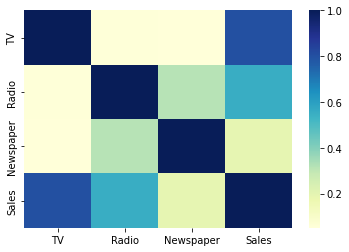

In [11]:
sns.heatmap(df.corr(method='spearman'), cmap='YlGnBu');

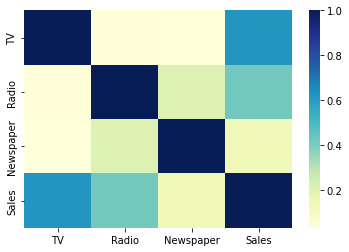

In [12]:
sns.heatmap(df.corr(method='kendall'), cmap='YlGnBu');

- Tv advertising has higher effect in sale 
- Newspaper has no effect on sales
       either less no. of people take intrest in newspaper or they ignore it

In [18]:
feature = df.columns
feature

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

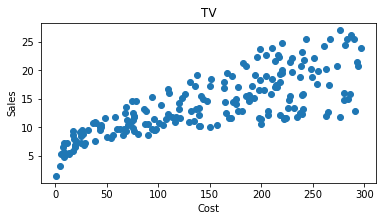

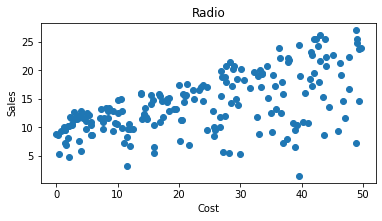

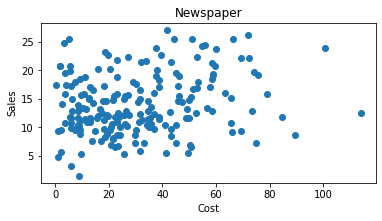

In [29]:
j = 1
for i in ['TV', 'Radio', 'Newspaper']:
    plt.figure(figsize=(6,10))
    plt.subplot(3,1,j)
    j += 1
    plt.scatter(x = i, y = 'Sales', data = df)
    plt.ylabel("Sales")
    plt.xlabel("Cost")
    plt.title(i)
    plt.show()

- Television adds has more effect in sales.
- newspaper dosen showing any co-relation with sales.
- checking tv and newspaper relation if any

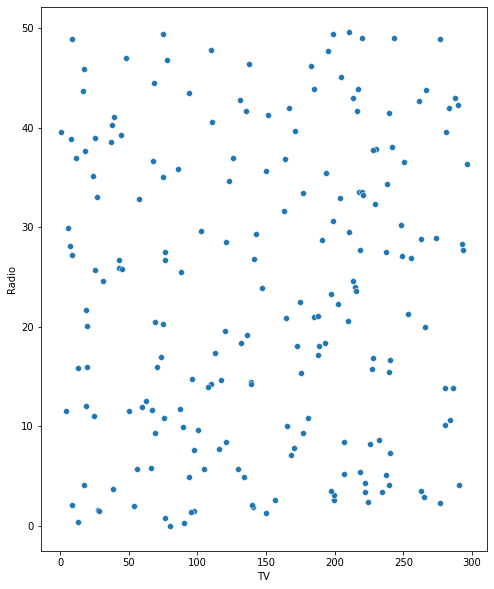

In [33]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='TV', y= 'Radio', data = df)
plt.show()

-TV and Radio has no relation so there is no multi-relation between features.

### missing values

In [37]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [44]:
# importing pandas profilings:

from pandas_profiling import ProfileReport

In [47]:
df_profile  = ProfileReport(df, dark_mode=True)

In [48]:
df_profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df_profile.to_file("Advertising.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [129]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        08:56:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- P value of Newspaper is grater then 50% it.
    Newspaper only success is 14% so we can drop it.(Dimension Reduction 100-86= 14%)

#  Appling Linear Regression

In [53]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [56]:
X = df[["TV", "Radio"]]
y = df.Sales

In [57]:
X.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_tarin,y_test = train_test_split(X,y, test_size=0.2)

In [84]:
y_test.shape

(40,)

In [62]:
#Linear Regression
model = LinearRegression(normalize = True)

model.fit(X_train,y_tarin)

LinearRegression(normalize=True)

In [99]:
y_pred = model.predict(X_test)
y_pred

array([10.645876  , 17.81718784,  9.17937651,  6.80871496, 13.75061748,
       11.71710833,  9.8412928 , 10.12124732, 13.82238082, 19.70737622,
        9.75260039, 12.09804082, 17.05570986, 21.74786971,  8.89076782,
       11.61129809, 17.24275537,  7.42976391, 13.92915941, 17.50100949,
        4.55459565, 21.62080139, 19.51773631, 23.13953692,  8.32504485,
       20.50732922, 10.1384471 , 13.53239964,  9.85647394, 12.82847606,
       19.23086609, 15.23191112, 12.89413375, 15.48528534, 16.24440917,
       15.37600201, 12.18497375, 10.18782572, 12.77548321, 18.41725503])

In [64]:
c = model.intercept_
m = model.coef_

In [65]:
print(c,m)

3.0166683237597223 [0.04630198 0.18086176]


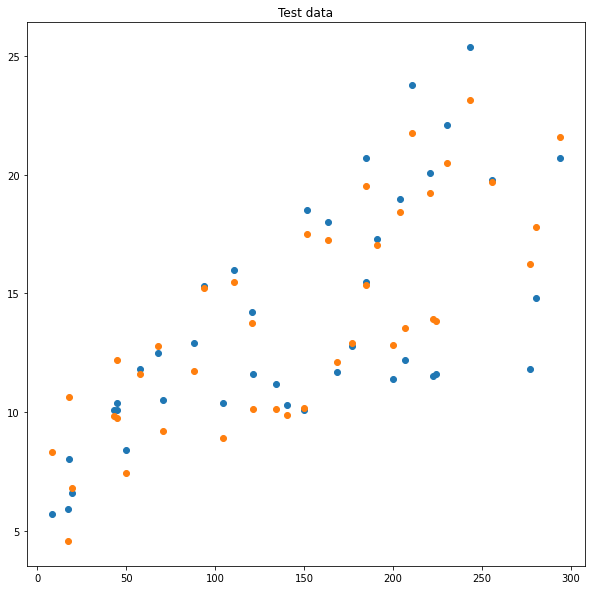

In [76]:
# comparing both predicting and actual value:

plt.figure(figsize=(10,10))
plt.scatter(x=X_test.TV,y=y_test);
plt.title("Test data")
plt.scatter(x=X_test.TV,y=y_pred,);

### Playing with pickle

In [89]:
pickle.dump(model, open("Pickle_file/Tv_adds.sav",'wb')) # for writting data

In [90]:
test_model = pickle.load(open("Pickle_file/Tv_adds.sav",'rb')) # for Reading data

In [95]:
test_model.predict([[230.1,37.8]])

array([20.50732922])

In [98]:
model.predict([[230.1,37.8]])

array([20.50732922])

### Importing Ai4i Dataset

In [149]:
Ai_df = pd.read_csv("Dataset/ai4i2020.csv", index_col='UDI')
Ai_df.head()

,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [136]:
Ai_df.tail()

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [137]:
Ai_df.columns

Index(['Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [138]:
Ai_df[Ai_df["Machine failure"]==1]

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0


In [139]:
Ai_df[Ai_df["Machine failure"]==1].describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000,339.000000,339.000000,339.000000,339.000000
mean,300.886431,310.290265,1496.486726,50.168142,143.781711,1.0,0.135693,0.339233,0.280236,0.289086,0.002950
std,2.071473,1.363686,384.943547,16.374498,72.759876,0.0,0.342969,0.474149,0.449778,0.454008,0.054313
min,295.600000,306.100000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.100000,309.500000,1326.500000,45.950000,84.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,301.600000,310.400000,1365.000000,53.700000,165.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,302.500000,311.200000,1421.500000,61.200000,207.500000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000
max,304.400000,313.700000,2886.000000,76.600000,253.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
Ai_df[Ai_df["Machine failure"]==1].count()

Product ID             339
Type                   339
Air temperature        339
Process temperature    339
Rotational speed       339
Torque                 339
Tool wear              339
Machine failure        339
TWF                    339
HDF                    339
PWF                    339
OSF                    339
RNF                    339
dtype: int64

In [141]:
Ai_df[Ai_df["Machine failure"]==0].count()

Product ID             9661
Type                   9661
Air temperature        9661
Process temperature    9661
Rotational speed       9661
Torque                 9661
Tool wear              9661
Machine failure        9661
TWF                    9661
HDF                    9661
PWF                    9661
OSF                    9661
RNF                    9661
dtype: int64

In [142]:
Ai_df.dtypes

Product ID              object
Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object

In [143]:
Ai_df[Ai_df["Machine failure"]==0].describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.0,9661.0,9661.0,9661.0,9661.0,9661.000000
mean,299.973999,309.995570,1540.260014,39.629655,106.693717,0.0,0.0,0.0,0.0,0.0,0.001863
std,1.990748,1.486846,167.394734,9.472080,62.945790,0.0,0.0,0.0,0.0,0.0,0.043126
min,295.300000,305.700000,1168.000000,12.600000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,298.300000,308.800000,1429.000000,33.100000,52.000000,0.0,0.0,0.0,0.0,0.0,0.000000
50%,300.000000,310.000000,1507.000000,39.900000,107.000000,0.0,0.0,0.0,0.0,0.0,0.000000
75%,301.500000,311.100000,1615.000000,46.300000,160.000000,0.0,0.0,0.0,0.0,0.0,0.000000
max,304.500000,313.800000,2695.000000,70.000000,246.000000,0.0,0.0,0.0,0.0,0.0,1.000000


- This Describe that we need to focus on only Machine Failure data

In [144]:
Ai_df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [145]:
Ai_df.columns

Index(['Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [151]:
newm = smf.ols(formula = 'Machine_failure ~ Air_temperature + Process_temperature + Rotational_speed + Torque + Tool_wear + TWF + HDF + PWF + OSF + RNF', data = Ai_df).fit()
newm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Machine_failure   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:13:26   Log-Likelihood:                 15258.
No. Observations:               10000   AIC:                        -3.049e+04
Df Residuals:                    9989   BIC:                        -3.041e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1504      0.117     -1.289      0.197      -0.379       0.078
Air_temperature        -0.0003      0.001     -0.500      0.617      -0.001       0.001
Process_temperature     0.0005      0.001      0.661      0.509      -0.001       0.002
Rotational_speed     3.873e-05   6.67e-06      5.809      0.000    2.57e-05    5.18e-05
Torque                  0.0006      0.000      5.036      0.000       0.000       0.001
Tool_wear            6.133e-06   8.43e-06      0.727      0.467   -1.04e-05    2.27e-05
TWF                     0.9258      0.008    118.077      0.000       0.910       0.941
HDF                     0.9332      0.005    183.447      0.000       0.923       0.943
PWF                     0.8424      0.006    140.981      0.000       0.831       0.854
OSF                     0.8038      0.006    144.552      0.000       0.793       0.815
RNF                     0.0005      0.012      0.039      0.969      -0.023       0.024
==============================================================================
Omnibus:                     6652.179   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30523707.672
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                     273.644   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
newm = smf.ols(formula = 'Machine_failure ~ Rotational_speed + Torque + TWF + HDF + PWF + OSF', data = Ai_df).fit()
newm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Machine_failure   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.804e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:21:32   Log-Likelihood:                 15257.
No. Observations:               10000   AIC:                        -3.050e+04
Df Residuals:                    9993   BIC:                        -3.045e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0807      0.015     -5.489      0.000      -0.110      -0.052
Rotational_speed  3.867e-05   6.66e-06      5.802      0.000    2.56e-05    5.17e-05
Torque               0.0006      0.000      5.023      0.000       0.000       0.001
TWF                  0.9264      0.008    118.966      0.000       0.911       0.942
HDF                  0.9328      0.005    186.972      0.000       0.923       0.943
PWF                  0.8423      0.006    141.017      0.000       0.831       0.854
OSF                  0.8045      0.005    146.554      0.000       0.794       0.815
==============================================================================
Omnibus:                     6657.154   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30551630.469
Skew:                          -1.467   Prob(JB):                         0.00
Kurtosis:                     273.768   Cond. No.                     4.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# Creating new df with use able features.

Ai_df2 = Ai_df[['Machine_failure','Rotational_speed','Torque','TWF','HDF', 'PWF', 'OSF']]
Ai_df2.head(2)

,Machine_failure,Rotational_speed,Torque,TWF,HDF,PWF,OSF
UDI,,,,,,,
1,0,1551,42.8,0,0,0,0
2,0,1408,46.3,0,0,0,0


In [115]:
Ai_df[Ai_df["RNF"]==1].count()

Product ID                 19
Type                       19
Air temperature [K]        19
Process temperature [K]    19
Rotational speed [rpm]     19
Torque [Nm]                19
Tool wear [min]            19
Machine failure            19
TWF                        19
HDF                        19
PWF                        19
OSF                        19
RNF                        19
dtype: int64

In [165]:
Ai_df2.describe()

,Machine_failure,Rotational_speed,Torque,TWF,HDF,PWF,OSF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033900,1538.776100,39.986910,0.004600,0.011500,0.009500,0.009800
std,0.180981,179.284096,9.968934,0.067671,0.106625,0.097009,0.098514
min,0.000000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1423.000000,33.200000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1503.000000,40.100000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1612.000000,46.800000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2886.000000,76.600000,1.000000,1.000000,1.000000,1.000000


### Finding Multi co-linearity

In [167]:
Ai_profile  = ProfileReport(Ai_df2)
Ai_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Rotational_speen and Torque are colinear and one can be remove.
- Removing Rotational_speed because it if affecting negatively our modle.

In [177]:
Ai_df2 = Ai_df2.drop(['Rotational_speed'], axis=1)

In [178]:
Ai_df2.head(2)

,Machine_failure,Torque,TWF,HDF,PWF,OSF
UDI,,,,,,
1,0,42.8,0,0,0,0
2,0,46.3,0,0,0,0


In [179]:
newm = smf.ols(formula = 'Machine_failure ~  Torque + TWF + HDF + PWF + OSF', data = Ai_df2).fit()
newm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Machine_failure   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:09:11   Log-Likelihood:                 15241.
No. Observations:               10000   AIC:                        -3.047e+04
Df Residuals:                    9994   BIC:                        -3.043e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      0.002      1.632      0.103      -0.001       0.008
Torque     -1.897e-05   5.44e-05     -0.349      0.727      -0.000    8.77e-05
TWF            0.9258      0.008    118.705      0.000       0.911       0.941
HDF            0.9329      0.005    186.688      0.000       0.923       0.943
PWF            0.8561      0.005    156.130      0.000       0.845       0.867
OSF            0.8072      0.005    147.320      0.000       0.796       0.818
==============================================================================
Omnibus:                     6827.392   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30755094.818
Skew:                          -1.562   Prob(JB):                         0.00
Kurtosis:                     274.666   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
Ai_df[Ai_df["RNF"]==1]

,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1


- This Show RNF is not showing any contribution towards our model

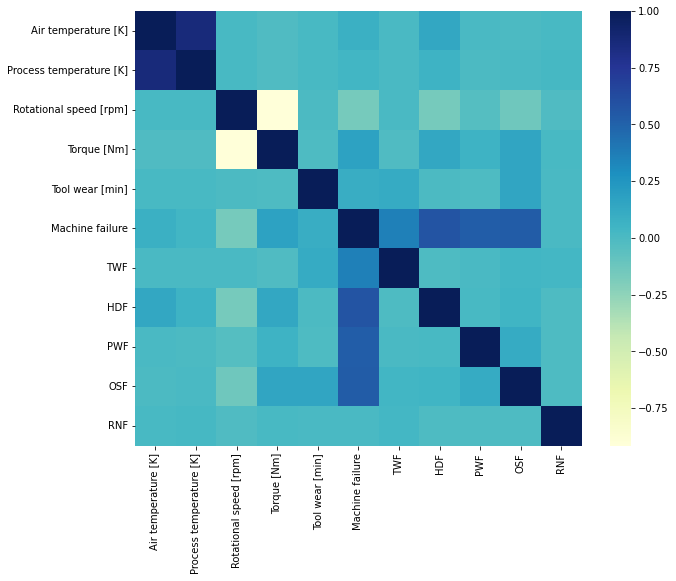

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(Ai_df.corr(method = "spearman"), cmap="YlGnBu");